# LAB 5

## Logistic Regression Quick Review

Logistic regression  is commonly used to estimate the probability that an instance belongs to a particular class. It is a binary classifer. It used a very useful function known as the sigmoid function.

Logistic regression model estimated probability is given by the hypothesis function given below. 

$$ \hat{p} = h(\theta) = g(\theta^T x) $$

where the sigmoid function \(g(z)\) is defined as:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

In [102]:
import numpy as np
import matplotlib.pyplot as plt

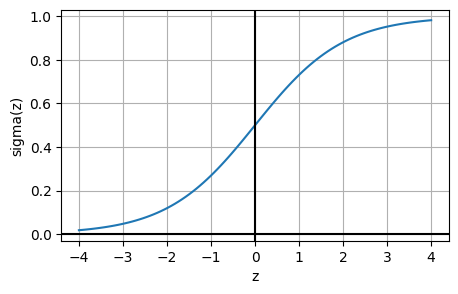

In [103]:
# Logistic Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# create a range of values from -4 to 4 with 100 steps in between
z = np.linspace(-4, 4, 100)
# apply the sigmoid function to the range
g_z = sigmoid(z)


# plot the sigmoid function
plt.figure(figsize=(5, 3))
plt.plot(z, g_z)

plt.xlabel('z')
plt.ylabel('sigma(z)')

plt.grid(True)
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

Once the logistic regression model has estimated the probability $\hat{p} = h_{\theta}(x)$ that an
instance $x$ belongs to the positive class, it can make its prediction $\hat{y}$ easily

$$
\hat{y} =
\begin{cases} 
1 & \text{if } \hat{p} < 0.5 \\
0 & \text{if } \hat{p} \geq 0.5 
\end{cases}
$$

So, the line $z = \theta^T x$ is considered as a decision boundary. All points equal to and above it, will be classified as positive, and all points below it will be classified as negative. 

## Training and Cost Function

The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances ($y = 1$) and low probabilities for negative instances ($y = 0$). This idea is captured by the cost function shown below for a single training instance $x$.

\begin{equation}
c(\theta) = 
\begin{cases} 
-\log(\hat{p}) & \text{if } y = 1 \\
-\log(1 - \hat{p}) & \text{if } y = 0 
\end{cases}
\end{equation}



The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the log loss, shown below.

\begin{equation}
J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})]
\end{equation}

The bad news is that there is no known closed-form equation to compute the value of $\theta$ that minimizes this cost function. But the good news is that this cost function is convex, so gradient descent (or any other optimization algorithm) is guaranteed to find the global minimum. 

The partial derivatives of the cost function with regard to the $ j^{\text{th}} $ model parameter $\theta_j$ are given by the equation below.

\begin{equation}
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(\theta^T \mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}
\end{equation}




## Decision Boundary

We will use the iris dataset to illustrate logistic regression. 
This is a famous dataset that contains the **sepal** and **petal** **length** and **width** of 150 iris flowers of three different species: **Iris setosa**, **Iris versicolor**, and **Iris virginica**.

Let’s try to build a classifier to detect the Iris virginica type based only on the **petal** features.

In [104]:
# load iris data set as pandas dataframe
# note that instance aren't shuffled
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [105]:
# show target
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [106]:
# show target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [107]:
# set X and y
# X should contain petal length and petal width
# y should be 1 if target is virginica, 0 otherwise
# we set y as boolean for binary classification
# note that we use numpy array instead of pandas dataframe
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'


In [108]:
# import logistic regression
# fit model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 
log_reg.fit(X, y)

LogisticRegression()

In [109]:
# show intercept and coefficients
log_reg.intercept_, log_reg.coef_

(array([-17.55616979]), array([[2.77983942, 2.38388751]]))

[2.9 7. ]


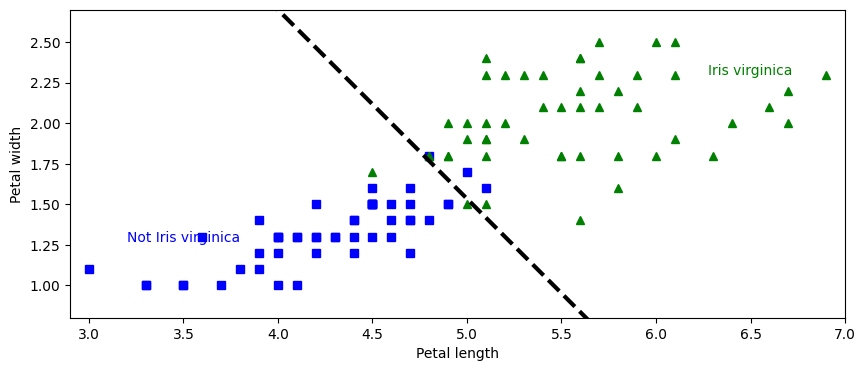

In [110]:
# for plotting the decision boundary, we need two points
# create two x1 values, say 2.9 and 7 (min and max of petal length)
# then calculate the corresponding x2 values 
# using the decision boundary equation
two_x1 = np.array([2.9, 7])
theta_0 = log_reg.intercept_[0] # intercept is a 1D array with one element
theta_1 = log_reg.coef_[0, 0] # coef_ is a 2D array with one row and two columns
theta_2 = log_reg.coef_[0, 1] # coef_ is a 2D array with one row and two columns
two_x2 = -(theta_0 + theta_1 * two_x1) / theta_2

print(two_x1)

plt.figure(figsize=(10, 4))

# plot the training instances of class 0 as blue squares (bs)
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
# plot the training instances of class 1 as green triangles (g^)
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

# plot the decision boundary as a k-- line. k-- is black dashed line
plt.plot(two_x1, two_x2, "k--", linewidth=3)

# show text labels for the class 0 and class 1
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")

# show the xlabel and ylabel
plt.xlabel("Petal length")
plt.ylabel("Petal width")

# show the axes from 2.9 to 7 and 0.8 to 2.7
# these are the min and max values of petal length and petal width
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [111]:
# create a new instance with petal length 6 and petal width 2
# predict the class of the new instance
log_reg.predict([[6, 2]])

array([ True])

In [112]:
# show probability of the new instance being class 0 and class 1
log_reg.predict_proba([[6, 2]])

array([[0.02002311, 0.97997689]])

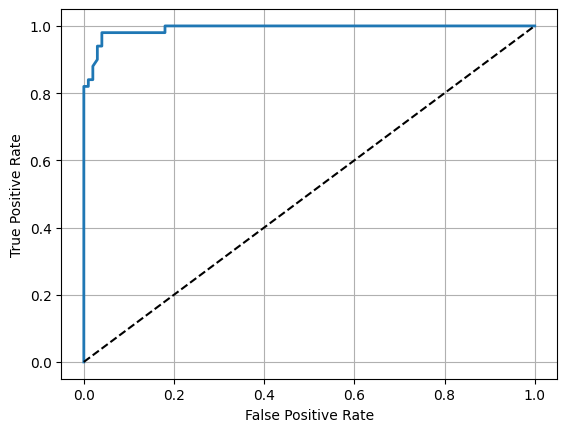

In [113]:
# build roc curve using cross_val_predict
# first, get the decision scores
# then, use the decision scores to build roc curve
# finally, plot the roc curve

from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(log_reg, X, y, cv=3, method="decision_function")

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

plot_roc_curve(fpr, tpr)

In [114]:
# show confusion matrix using cross_val_predict
# first, get the predictions
# then, use the predictions to build confusion matrix
# finally, plot the confusion matrix

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(log_reg, X, y, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[96,  4],
       [ 2, 48]], dtype=int64)

# STUDENT SECTION

The goal is to make a logistic regression classifier on the sepal features for the binary clasification problem of virginica / not virginica.

In [115]:
# set X and y
# X should contain sepal length and sepal width
# y should be 1 if target is virginica, 0 otherwise
# we set y as boolean for binary classification
# note that we use numpy array instead of pandas dataframe

X = iris.data[['sepal length (cm)', 'sepal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'




In [116]:
# Create a logistic regresion object and fit it to the problem we are trying to solve
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 
log_reg.fit(X, y)



LogisticRegression()

[4.3 7.9]


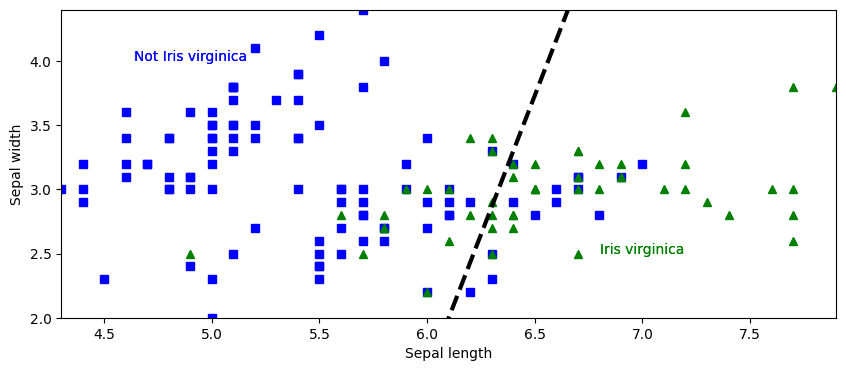

In [117]:
# for plotting the decision boundary, we need two points
# create two x1 values, say 2.9 and 7 (min and max of petal length)
# then calculate the corresponding x2 values 
# using the decision boundary equation
#two_x1 = np.array([2.9, 7])
#theta_0 = log_reg.intercept_[0] # intercept is a 1D array with one element
#theta_1 = log_reg.coef_[0, 0] # coef_ is a 2D array with one row and two columns
#theta_2 = log_reg.coef_[0, 1] # coef_ is a 2D array with one row and two columns
#two_x2 = -(theta_0 + theta_1 * two_x1) / theta_2

#plt.figure(figsize=(10, 4))

# plot the training instances of class 0 as blue squares (bs)
#plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
# plot the training instances of class 1 as green triangles (g^)
#plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")



# create two x1 values, the min and max of sepal length (hint use X[:,0] to access the sepal lengths)
# then calculate the corresponding x2 values 
# using the decision boundary equation
max_sepal = max(X[:,0])
min_sepal = min(X[:,0])

#print(max_sepal)
#print(min_sepal)

two_x1 = np.array([min_sepal, max_sepal])
theta_0 = log_reg.intercept_[0] # intercept is a 1D array with one element
theta_1 = log_reg.coef_[0, 0] # coef_ is a 2D array with one row and two columns
theta_2 = log_reg.coef_[0, 1] # coef_ is a 2D array with one row and two columns
two_x2 = -(theta_0 + theta_1 * two_x1) / theta_2

print(two_x1)


plt.figure(figsize=(10, 4))

# plot the training instances of class 0 as blue squares (bs)
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
# plot the training instances of class 1 as green triangles (g^)
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")


# plot the decision boundary as a k-- line. k-- is black dashed line
plt.plot(two_x1, two_x2, "k--", linewidth=3)

# show text labels for the class 0 and class 1
plt.text(4.9, 4, "Not Iris virginica", color="b", ha="center")
plt.text(7, 2.5, "Iris virginica", color="g", ha="center")

# Just put these in a reasonable place (4.9, 4) and (7,2.5) are what I would recommend
plt.text(4.9, 4, "Not Iris virginica", color="b", ha="center")
plt.text(7, 2.5, "Iris virginica", color="g", ha="center")

# show the xlabel and ylabel
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# show the axes from the min and max values of petal length and petal width
plt.axis([np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])])

plt.show()

In [118]:
# Get the decision scores 
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(log_reg, X, y, cv=3, method="decision_function")

y_scores


array([-2.66942874, -3.15883603, -3.52444419, -3.74261944, -2.85223282,
       -1.99721738, -3.68956267, -2.887604  , -4.17896996, -3.14115044,
       -2.03258856, -3.28858334, -3.3593257 , -4.36177404, -1.17757312,
       -1.30732042, -1.99721738, -2.66942874, -1.41343397, -2.61637197,
       -2.08564533, -2.63405756, -3.65419149, -2.70479993, -3.28858334,
       -2.95834637, -2.887604  , -2.46893908, -2.48662467, -3.52444419,
       -3.34164011, -2.08564533, -2.36282553, -1.74367094, -3.09860442,
       -2.90208823, -1.86523905, -3.23427489, -4.18972179, -2.73270612,
       -2.98349051, -3.77613284, -4.24398997, -2.98349051, -2.84124249,
       -3.29512062, -2.84124249, -3.79668939, -2.36680782, -2.92922232,
        1.5709176 ,  0.22901585,  1.37440141, -1.53962993,  0.56120252,
       -1.22799981, -0.02176853, -2.90866577,  0.75771872, -2.31911718,
       -2.5764791 , -0.83496742, -0.39424438, -0.36053274, -1.4787842 ,
        0.92710082, -1.50591829, -0.40474445,  1.10750496, -0.55

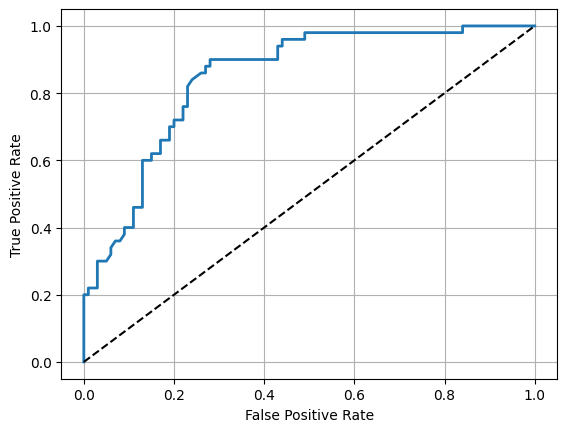

In [119]:
# compute the roc curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
# plot the roc curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

plot_roc_curve(fpr, tpr)


In [120]:
# Get the predictions for the default threshold
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(log_reg, X, y, cv=3)

In [121]:
# Print the confusion matrix


from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[82, 18],
       [17, 33]], dtype=int64)

: 